<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_2_Diabetes_pred/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
X = df.drop(columns=["Outcome"],axis=1)
Y = df["Outcome"]

In [ ]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
print("Original:", Counter(Y))

ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

print("After Oversampling:", Counter(Y_resampled))

Original: Counter({0: 500, 1: 268})
After Oversampling: Counter({1: 500, 0: 500})


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)

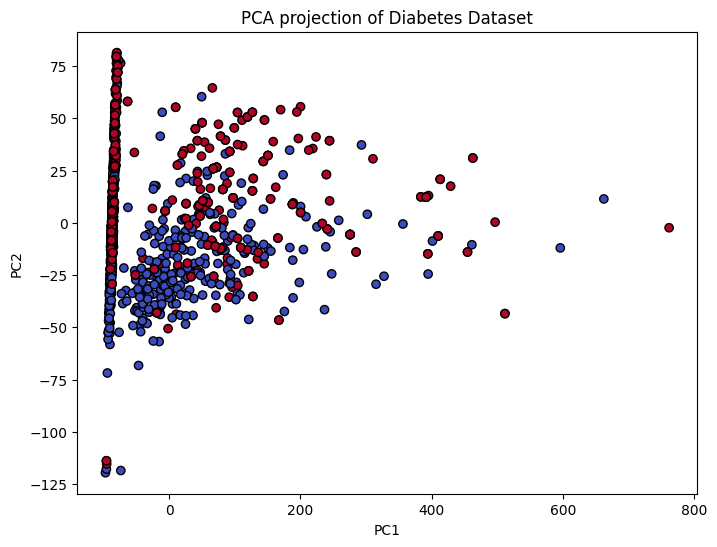

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(Y_resampled == 1), cmap='coolwarm', edgecolor='k')
plt.title("PCA projection of Diabetes Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# **USING LOGISTIC REGRESSION**

In [ ]:
lr_model = LogisticRegression()

In [ ]:
start = time.time()
lr_model = lr_model.fit(X_train_scaled,Y_train)
y_pred = lr_model.predict(X_test_scaled)
end = time.time()

In [ ]:
print(f"⏱️ Time taken: {end - start:.3f} seconds")

print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

⏱️ Time taken: 0.041 seconds
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        99
           1       0.75      0.72      0.74       101

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



# **USING SVMs**

In [ ]:
svm_model = SVC()

In [ ]:
start = time.time()
svm_model = svm_model.fit(X_train_scaled,Y_train)
y_pred = svm_model.predict(X_test_scaled)
end = time.time()

In [ ]:
print(f"⏱️ Time taken: {end - start:.3f} seconds")

print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

⏱️ Time taken: 0.056 seconds
Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        99
           1       0.75      0.77      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    print(f"\n🔍 SVM with {kernel} kernel:")

    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, C=10, degree=3)
    else:
        svm_model = SVC(kernel=kernel, C=10)

    start = time.time()
    svm_model.fit(X_train_scaled, Y_train)
    y_pred = svm_model.predict(X_test_scaled)
    end = time.time()

    print(f"⏱️ Time taken: {end - start:.3f} seconds")

    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))


🔍 SVM with linear kernel:
⏱️ Time taken: 0.140 seconds
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        99
           1       0.76      0.70      0.73       101

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200


🔍 SVM with rbf kernel:
⏱️ Time taken: 0.054 seconds
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.76      0.79      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200


🔍 SVM with poly kernel:
⏱️ Time taken: 0.077 seconds
Accuracy: 0.785
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.82     

# **Other Algorithms**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
models = {
    "RandomForest" : RandomForestClassifier(n_estimators = 100),
    "XGBoost" : XGBClassifier(eval_metric='logloss'),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "MLP (Neural Net)" : MLPClassifier(hidden_layer_sizes=(64,), max_iter=5000)
}

In [ ]:
for name , model in models.items():
    print(f"\n{name}")
    start = time.time()
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    duration = time.time() - start
    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
    print(f"Time taken: {duration:.2f} seconds")
    print(classification_report(Y_test, y_pred))


RandomForest
Accuracy: 0.8250
Time taken: 0.40 seconds
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.82      0.84      0.83       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200


XGBoost
Accuracy: 0.7650
Time taken: 1.11 seconds
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.77      0.76      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200


KNN
Accuracy: 0.7900
Time taken: 0.03 seconds
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.78      0.82      0.80       101

    accuracy                